<a href="https://colab.research.google.com/github/anushna9/TE_ML_Assignments/blob/main/1_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Heart.csv")

In [ ]:
data.shape

(303, 15)

In [ ]:
data.head

<bound method NDFrame.head of      Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca  

In [ ]:
missing = data.isnull().sum()
missing

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [ ]:
data.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [ ]:
mean = data['Chol'].mean()

In [ ]:
x = data.drop(columns=["AHD"])

In [ ]:
x

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal


In [ ]:
data.corr()

<ipython-input-18-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
Unnamed: 0,1.000000,-0.002367,-0.070849,-0.022028,-0.095518,-0.039471,-0.150232,-0.105488,-0.000402,-0.120384,-0.028458,0.046938
Age,-0.002367,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605
Sex,-0.070849,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185
RestBP,-0.022028,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773
Chol,-0.095518,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000
Fbs,-0.039471,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478
RestECG,-0.150232,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343
MaxHR,-0.105488,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246
ExAng,-0.000402,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570
Oldpeak,-0.120384,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832


In [ ]:
data['ExAng'] = data['ExAng'].replace({ 1 : 'Yes' , 0 : 'No'})

In [ ]:
#data['AHD'] = data['AHD'].replace({ 'Yes' : 1 , 'No': 0})
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


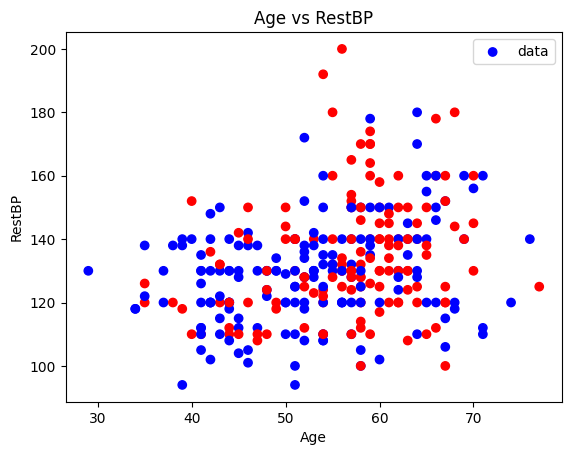

In [ ]:
x_column = 'Age'
y_column = 'RestBP'

plt.scatter(data[x_column], data[y_column],c=data['AHD'].map({'Yes':'r', 'No':'b'}),label = 'data')

plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'{x_column} vs {y_column}')
plt.legend()
plt.show()